Your task is to perform statistical analysis using this dataset.
https://www.kaggle.com/datasets/abrambeyer/openintro-possum
You are to document in detail, the interpretation of your results from all the measures of centre, all measures of spread,  and outlier detection mechanisms.

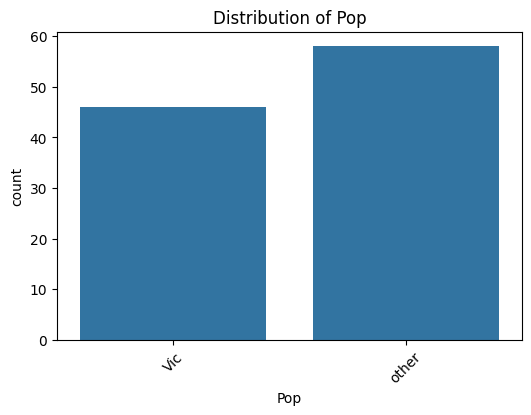

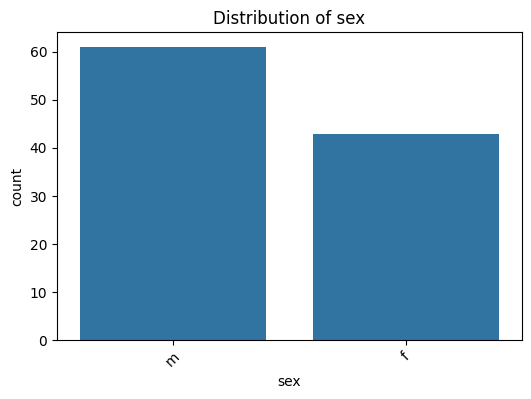

In [ ]:
# 1. Visualize categorical variable distributions
import matplotlib.pyplot as plt
import seaborn as sns

for col in categorical_cols.columns: # Iterate over each categorical column
    plt.figure(figsize=(6, 4)) # Set the figure size
    sns.countplot(data=possum_data, x=col) # Create a count plot for the column
    plt.title(f'Distribution of {col}') # Set the title of the plot
    plt.xticks(rotation=45) # Rotate x-axis labels for better readability
    plt.show()  # Display the plot

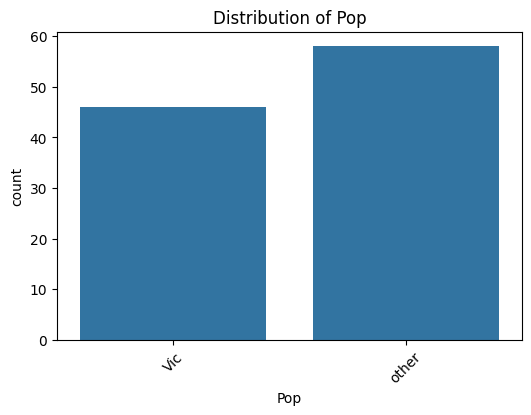

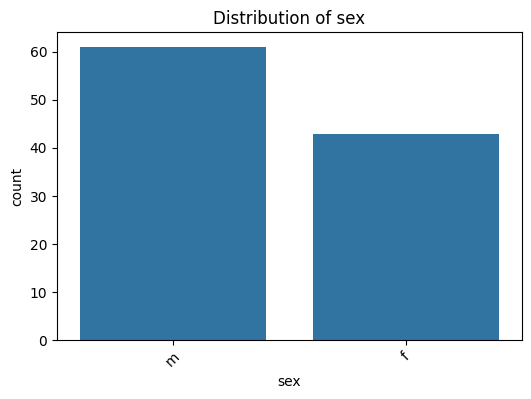

In [ ]:
# 1. Visualize categorical variable distributions
import matplotlib.pyplot as plt
import seaborn as sns

for col in categorical_cols.columns: # Iterate over each categorical column
    plt.figure(figsize=(6, 4)) # Set the figure size
    sns.countplot(data=possum_data, x=col) # Create a count plot for the column
    plt.title(f'Distribution of {col}') # Set the title of the plot
    plt.xticks(rotation=45) # Rotate x-axis labels for better readability
    plt.show()  # Display the plot

In [12]:
# importing  neccesary libraries

%pip install scipy

import pandas as pd  #pandas for data manipulation
import numpy as np  #numpy for numerical operations
import matplotlib.pyplot as plt #matplotlib for data visualization 
import seaborn as sns   #seaborn for statistical data visualization
import os  #os for operating system interactions
import scipy.stats as stats  #scipy for scientific computing
import statistics  #statistics for statistical functions


print("imported successes ")

Note: you may need to restart the kernel to use updated packages.
imported successes 


In [13]:
#Load in the posson dataset from the data folder
possum_data = pd.read_csv('possum.csv')    # Load the dataset
print("Data Loaded Successfully")

Data Loaded Successfully


In [14]:
#viewing a few rows of the dataset
possum_data.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [23]:
#viewing the last few rows of the dataset
possum_data.tail()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0
103,104,7,other,f,3.0,93.6,59.9,89.0,40.0,67.6,46.0,14.8,28.5,33.5


In [15]:
# Viewing  the number of rows and columns in the dataset
possum_data.shape

(104, 14)

In [16]:
# Viewing the data types of each column
possum_data.dtypes

case          int64
site          int64
Pop          object
sex          object
age         float64
hdlngth     float64
skullw      float64
totlngth    float64
taill       float64
footlgth    float64
earconch    float64
eye         float64
chest       float64
belly       float64
dtype: object

In [17]:
# Viewing  a summary of the dataset
possum_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [24]:
# checking for missing values
possum_data[possum_data.isna().any(axis=1)] # Check for rows with any missing values
print(possum_data.isna().sum())  # Check for missing values in each column


case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64


In [25]:
# removing missing values
possum_data = possum_data.dropna()  # Drop rows with any missing values
print("Missing values handled")


Missing values handled


In [34]:
# resetting the index
possum_data.reset_index(drop=True, inplace=True)  # Reset index after dropping rows because the index of the rows dropped 
print("Index reset successfully")

Index reset successfully


In [35]:
# checking the shape after removing missing values
possum_data.shape

(101, 14)

In [26]:
# checking for missing values again
possum_data[possum_data.isna().any(axis=1)] # Check for rows with any missing values
print(possum_data.isna().sum())  # Check for missing values in each column

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64


In [27]:
# checking for duplicates
duplicates = possum_data.duplicated()   # Check for duplicate rows
print(f"Number of duplicate rows: {duplicates.sum()}")  # Print the number of duplicate rows

Number of duplicate rows: 0


In [29]:
# Lets get the description for sex by age
possum_data.groupby('sex')['age'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
f,42.0,3.95,1.96,1.0,3.0,3.5,5.0,9.0
m,59.0,3.73,1.89,1.0,2.0,3.0,5.0,8.0


The dataset seems clean 

# Performing statistical analysis

In [33]:
#measures of central tendency for hdlngth
mean_hdlngth = possum_data['hdlngth'].mean().round(2)  # Calculate mean
median_hdlngth = possum_data['hdlngth'].median()  # Calculate median
mode_hdlngth = possum_data['hdlngth'].mode()[0]  # Calculate mode
print(f"Mean Head Length: {mean_hdlngth}, Median Age: {median_hdlngth}, Mode Age: {mode_hdlngth}")


Mean Head Length: 92.73, Median Age: 92.9, Mode Age: 93.3


In [32]:
#measures of central tendency for age
mean_age = possum_data['age'].mean().round(2)  # Calculate mean
median_age = possum_data['age'].median()  # Calculate median
mode_age = possum_data['age'].mode()[0]  # Calculate mode
print(f"Mean Age: {mean_age}, Median Age: {median_age}, Mode Age: {mode_age}")

Mean Age: 3.82, Median Age: 3.0, Mode Age: 3.0


In [36]:
def full_descriptive(sr):
    """sr is a pandas Series of floats/ints."""
    n   = sr.count()
    mean= sr.mean()
    med = sr.median()
    std = sr.std(ddof=1)                 # sample sd
    q1  = sr.quantile(0.25)
    q3  = sr.quantile(0.75)
    iqr = q3 - q1
    mad = stats.median_abs_deviation(sr, scale='normal')  # consistent with R
    cv  = std/mean*100
    lower_fence = q1 - 1.5*iqr
    upper_fence = q3 + 1.5*iqr
    outside  = sr[(sr < lower_fence) | (sr > upper_fence)]
    return {"n":n,
            "mean":mean,
            "median":med,
            "std":std,
            "IQR":iqr,
            "MAD":mad,
            "CV%":cv,
            "min":sr.min(),
            "max":sr.max(),
            "range":sr.max()-sr.min(),
            "lower_fence":lower_fence,
            "upper_fence":upper_fence,
            "#outside":len(outside),
            "outlier_cases": outside.index.tolist()}

In [ ]:
print("\n=== VISUAL REPRESENTATION ===")
for track in ['Traditional', 'Accelerated']:
    track_data = data[data['Learning_Track'] == track]

In [ ]:
#measures of spread for age
std_age = possum_data['age'].std()  # Calculate standard deviation

In [19]:
#measures of spread


In [20]:
#outlier detection mechanisms

# Further Analysis of Possum Dataset

In this section, we will perform additional statistical analysis, including:
- Visualization of categorical variable distributions
- Visualization and summary of numerical variables
- Outlier detection using boxplots
- Correlation analysis between numerical features
- Interpretation of results

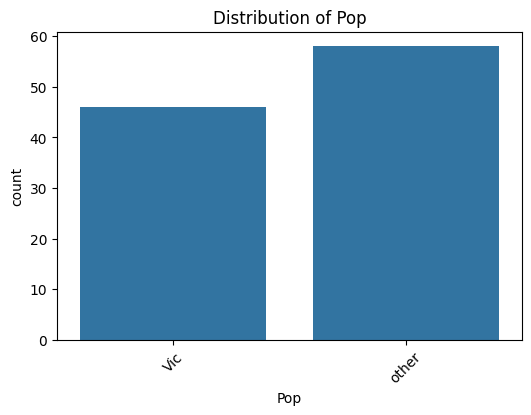

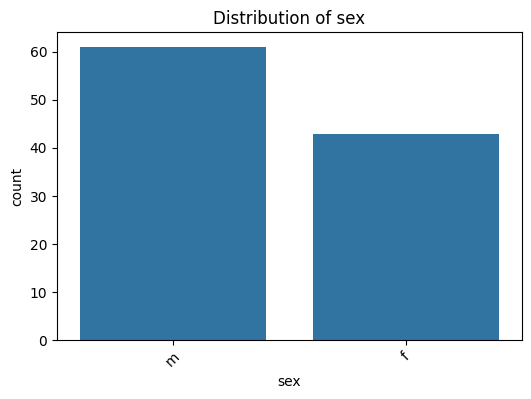

In [ ]:
# 1. Visualize categorical variable distributions
import matplotlib.pyplot as plt
import seaborn as sns

for col in categorical_cols.columns: # Iterate over each categorical column
    plt.figure(figsize=(6, 4)) # Set the figure size
    sns.countplot(data=possum_data, x=col) # Create a count plot for the column
    plt.title(f'Distribution of {col}') # Set the title of the plot
    plt.xticks(rotation=45) # Rotate x-axis labels for better readability
    plt.show()  # Display the plot

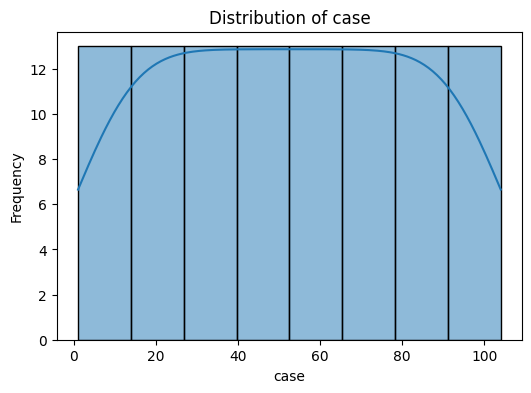

count    104.00
mean      52.50
std       30.17
min        1.00
25%       26.75
50%       52.50
75%       78.25
max      104.00
Name: case, dtype: float64


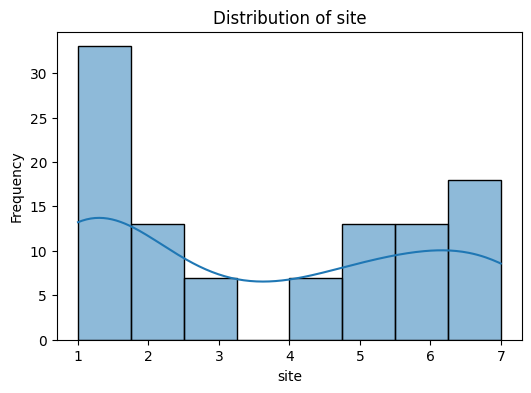

count    104.00
mean       3.62
std        2.35
min        1.00
25%        1.00
50%        3.00
75%        6.00
max        7.00
Name: site, dtype: float64


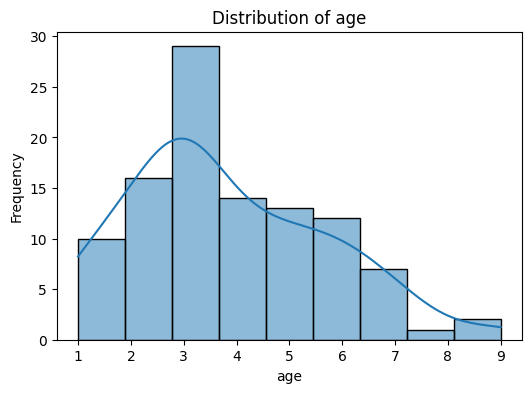

count    104.00
mean       3.82
std        1.89
min        1.00
25%        2.75
50%        3.00
75%        5.00
max        9.00
Name: age, dtype: float64


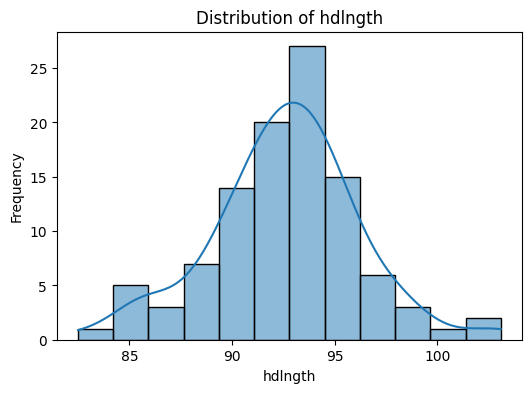

count    104.00
mean      92.60
std        3.57
min       82.50
25%       90.68
50%       92.80
75%       94.72
max      103.10
Name: hdlngth, dtype: float64


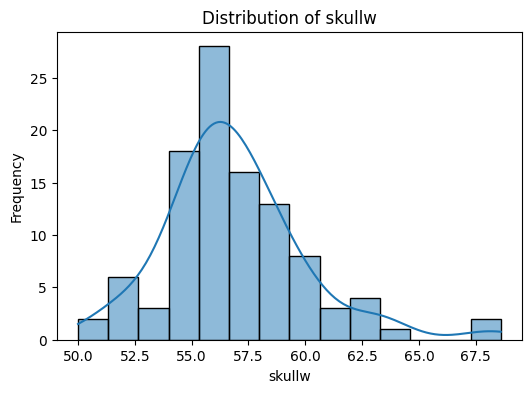

count    104.00
mean      56.88
std        3.11
min       50.00
25%       54.98
50%       56.35
75%       58.10
max       68.60
Name: skullw, dtype: float64


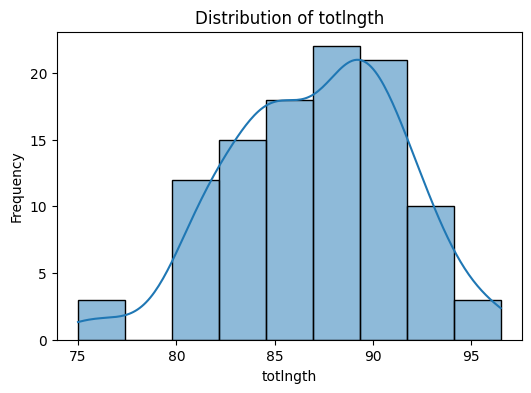

count    104.00
mean      87.09
std        4.31
min       75.00
25%       84.00
50%       88.00
75%       90.00
max       96.50
Name: totlngth, dtype: float64


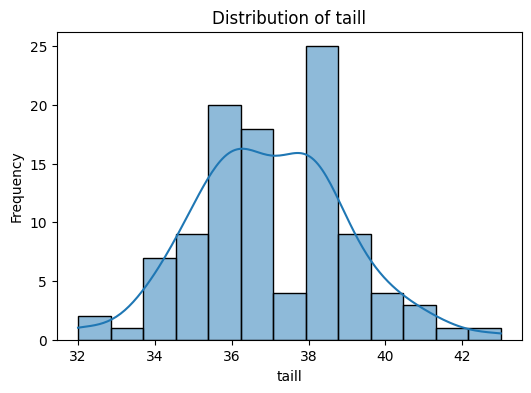

count    104.00
mean      37.01
std        1.96
min       32.00
25%       35.88
50%       37.00
75%       38.00
max       43.00
Name: taill, dtype: float64


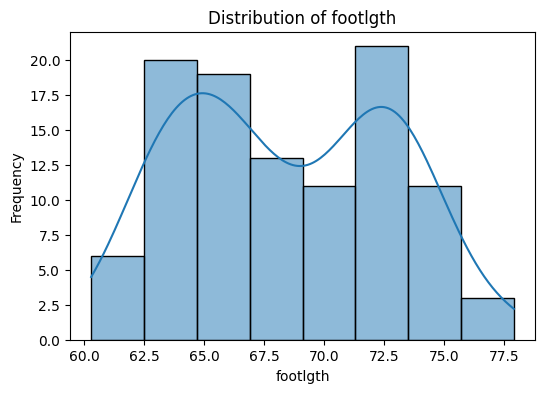

count    104.00
mean      68.45
std        4.37
min       60.30
25%       64.65
50%       68.00
75%       72.50
max       77.90
Name: footlgth, dtype: float64


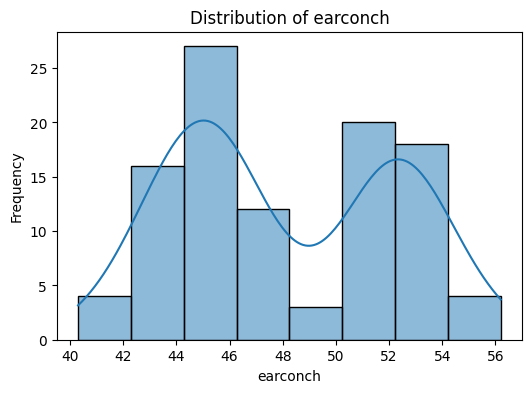

count    104.00
mean      48.13
std        4.11
min       40.30
25%       44.80
50%       46.80
75%       52.00
max       56.20
Name: earconch, dtype: float64


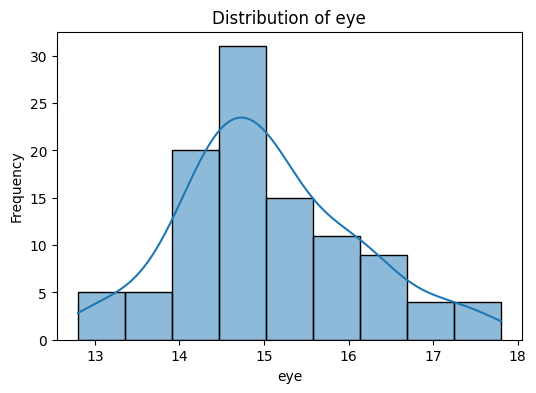

count    104.00
mean      15.05
std        1.05
min       12.80
25%       14.40
50%       14.90
75%       15.72
max       17.80
Name: eye, dtype: float64


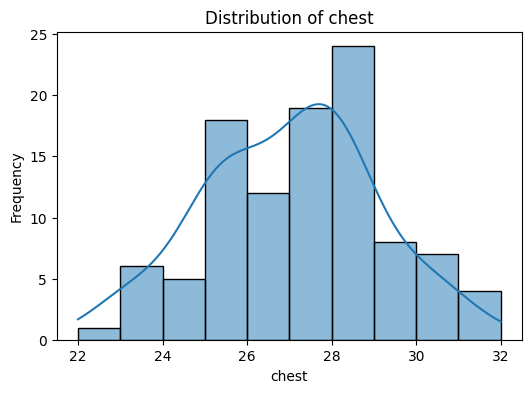

count    104.00
mean      27.00
std        2.05
min       22.00
25%       25.50
50%       27.00
75%       28.00
max       32.00
Name: chest, dtype: float64


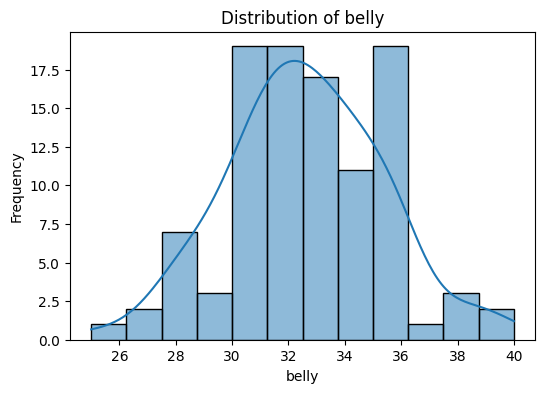

count    104.00
mean      32.59
std        2.76
min       25.00
25%       31.00
50%       32.50
75%       34.12
max       40.00
Name: belly, dtype: float64


In [ ]:
# 2. Visualize and summarize numerical variables
numerical_cols = possum_data.select_dtypes(include=['number']).columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4)) #plot size
    sns.histplot(possum_data[col], kde=True) #
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    print(possum_data[col].describe().round(2))
    

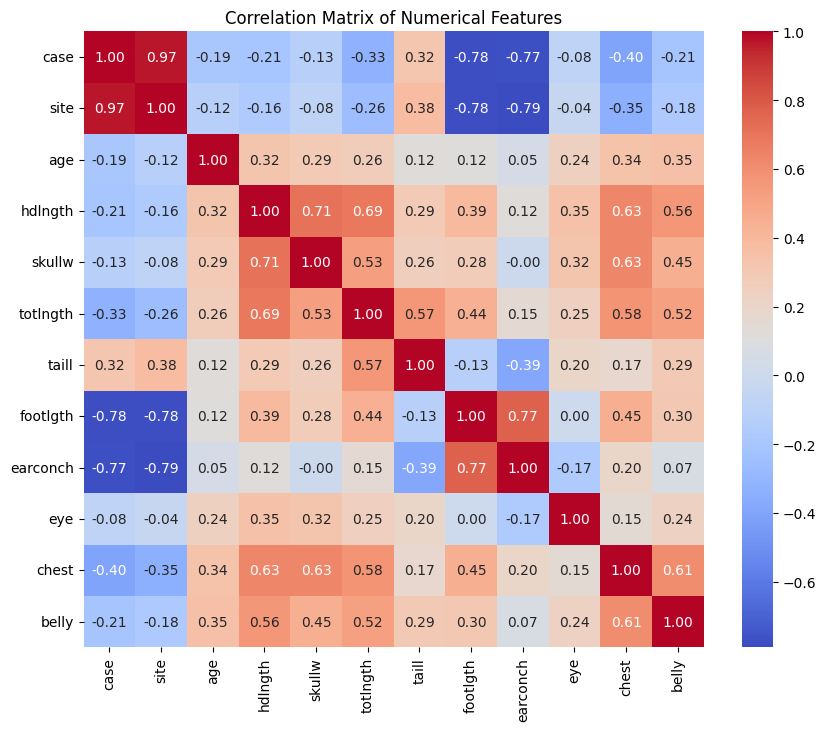

In [ ]:
# 4. Correlation analysis between numerical features
corr_matrix = possum_data[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Interpretation of Results

- The categorical variable plots reveal the distribution and balance of categories in the dataset.
- Numerical variable histograms and boxplots help identify skewness, modality, and outliers.
- The correlation matrix highlights relationships between numerical features, which can inform further statistical modeling or feature selection.
- Outliers detected in boxplots may warrant further investigation or cleaning, depending on the analysis goals.

Feel free to extend this analysis with advanced statistical tests or predictive modeling as needed.